---
# <center>**- SES 722 : Projet Econométrie -**</center>
---

Par :
- ***Philippe Bénézeth***
- ***Thomas Koch***


## **Partie 1**

In [3]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')

import seaborn as sns

# Statistical models
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f
import statsmodels.api as sm

In [4]:
plt.style.available
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['tableau-colorblind10',
 'seaborn-bright',
 'seaborn-poster',
 'ggplot',
 'seaborn',
 'seaborn-muted',
 'seaborn-dark-palette',
 'fast',
 'seaborn-darkgrid',
 'seaborn-talk',
 'Solarize_Light2',
 'classic',
 'fivethirtyeight',
 'bmh',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-paper',
 'grayscale',
 'dark_background',
 '_classic_test',
 'seaborn-white',
 'seaborn-colorblind']

### **Question 1 :**
Lire le fichier `mroz.txt`. Ne sélectionner que les observations pour lesquelles la variable `wage`
est strictement positive.


***MROZ.DES***
   
   Obs:   753
  
| Header 1 | Header 2 | Header 3 |
|----------|----------|----------|
| 1.       | inlf     | =1 if in labor force, 1975 |
| 2.       | hours    | hours worked, 1975 |
| 3.       | kidslt6  | # kids < 6 years |
| 4.       | kidsge6  | # kids 6-18 |
| 5.       | age      | woman's age in yrs |
| 6.       | educ     | years of schooling |
| 7.       | wage     | estimated wage from earns., hours |
| 8.       | repwage  | reported wage at interview in 1976 |
| 9.       | hushrs   | hours worked by husband, 1975 |
| 10.      | husage   | husband's age |
| 11.      | huseduc  | husband's years of schooling |
| 12.      | huswage  | husband's hourly wage, 1975 |
| 13.      | faminc   | family income, 1975 |
| 14.      | mtr      | fed. marginal tax rate facing woman |
| 15.      | motheduc | mother's years of schooling |
| 16.      | fatheduc | father's years of schooling |
| 17.      | unem     | unem. rate in county of resid. |
| 18.      | city     | =1 if live in SMSA |
| 19.      | exper    | actual labor mkt exper |
| 20.      | nwifeinc | (faminc - wage\*hours)/1000 |
| 21.      | lwage    | log(wage) |
| 22.      | expersq  | exper² |


In [5]:
columns = ["inif", "hours", "kidslt6", "kidsge6", "age",
           "educ", "wage", "repwage", "hushrs", "husage",
           "huseduc", "huswage", "faminc", "mtr", "motheduc",
           "fatheduc", "unem", "city", "exper", "nwifeinc",
           "lwage", "expersq"]  

df = pd.read_csv('MROZ.raw', delim_whitespace=True, names=columns)
# voir MROZ.DES (description) pour description des données

In [6]:
df.head()

,inif,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [7]:
df.dtypes

inif          int64
hours         int64
kidslt6       int64
kidsge6       int64
age           int64
educ          int64
wage         object
repwage     float64
hushrs        int64
husage        int64
huseduc       int64
huswage     float64
faminc        int64
mtr         float64
motheduc      int64
fatheduc      int64
unem        float64
city          int64
exper         int64
nwifeinc    float64
lwage        object
expersq       int64
dtype: object

In [8]:
df[['wage', 'lwage']].head()

,wage,lwage
0,3.354,1.210154
1,1.3889,.3285121
2,4.5455,1.514138
3,1.0965,.0921233
4,4.5918,1.524272


In [9]:
# Changing object types to float

object_cols = ['wage', 'lwage']

for i in object_cols:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [10]:
df.dtypes

inif          int64
hours         int64
kidslt6       int64
kidsge6       int64
age           int64
educ          int64
wage        float64
repwage     float64
hushrs        int64
husage        int64
huseduc       int64
huswage     float64
faminc        int64
mtr         float64
motheduc      int64
fatheduc      int64
unem        float64
city          int64
exper         int64
nwifeinc    float64
lwage       float64
expersq       int64
dtype: object

In [11]:
df.describe()

,inif,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,428.000000,753.000000
mean,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,4.177682,1.849734,2267.270916,45.120850,...,23080.594954,0.678863,9.250996,8.808765,8.623506,0.642762,10.63081,20.128964,1.190173,178.038513
std,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.310282,2.419887,595.566649,8.058793,...,12190.202026,0.083496,3.367468,3.572290,3.114934,0.479504,8.06913,11.634797,0.723198,249.630849
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000,-0.029057,-2.054164,0.000000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,38.000000,...,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000,13.025040,0.816509,16.000000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,46.000000,...,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000,17.700000,1.247574,81.000000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,52.000000,...,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000,24.466000,1.603571,225.000000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000,96.000000,3.218876,2025.000000


In [12]:
# Selecting only positive wage
df_filtered = pd.DataFrame(df[df.wage > 0.])

print("\nNous avons {} observations valables.\n".format(df_filtered.shape[0]))

df_filtered.describe()


Nous avons 428 observations valables.



,inif,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,428.0,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1.0,1302.929907,0.140187,1.350467,41.971963,12.658879,4.177682,3.185864,2233.464953,44.609813,...,24130.422897,0.668333,9.516355,8.988318,8.545561,0.640187,13.037383,18.937483,1.190173,234.719626
std,0.0,776.274385,0.391923,1.315935,7.721084,2.285376,3.310282,2.439640,582.908769,7.950055,...,11671.255986,0.076936,3.308100,3.523405,3.033328,0.480507,8.055923,10.591354,0.723198,270.043358
min,1.0,12.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,2400.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.000000,-0.029057,-2.054164,0.000000
25%,1.0,609.500000,0.000000,0.000000,35.000000,12.000000,2.262600,1.420000,1920.000000,38.000000,...,16286.250000,0.621500,7.000000,7.000000,7.500000,0.000000,7.000000,12.365247,0.816509,49.000000
50%,1.0,1365.500000,0.000000,1.000000,42.000000,12.000000,3.481900,3.195000,2106.500000,45.000000,...,21961.000000,0.691500,10.000000,7.000000,7.500000,1.000000,12.000000,17.080000,1.247574,144.000000
75%,1.0,1910.500000,0.000000,2.000000,47.250000,14.000000,4.970750,4.550000,2504.000000,51.000000,...,29793.000000,0.721500,12.000000,12.000000,11.000000,1.000000,18.000000,23.515000,1.603571,324.000000
max,1.0,4950.000000,2.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,91044.000000,0.941500,17.000000,17.000000,14.000000,1.000000,38.000000,91.000000,3.218876,1444.000000


### **Question 2 :**

Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des
femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de
l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de
l’échantillon. Commenter

#### **Statistiques pour l'ensemble des femmes**

In [13]:
df_filtered[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


> En moyenne, nous relevons donc pour l'ensemble des femmes :
- Un salaire moyen de **4.17**
- Un âge moyen de **42 ans**
- Un nombre d'années d'études de **12.7 ans**

#### **Statistiques pour les femmes dont le salaire du mari est supérieur au 65ème percentile de l'échantillon**

In [14]:
# Finding the 65th percentil husband wage
percentil_65 = df_filtered.huswage.quantile(0.65)
print('Le 65e percentile sur le salaire du mari est de {}'.format(percentil_65))

Le 65e percentile sur le salaire du mari est de 7.8125


In [15]:
df_huswage_gt_65 = df_filtered[df_filtered['huswage'] > percentil_65]

In [16]:
df_huswage_gt_65[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


> En moyenne, nous relevons donc pour les femmes dont le salaire du mari est supérieur au 65e percentile de l'échantillon :
- Un salaire moyen de **5.14**
- Un âge moyen de **42.5 ans**
- Un nombre d'années d'études de **13.5 ans**

> Les chiffres pour cette population montrent donc que ces femmes sont plus éduquées et ont un salaire plus élevé. Il y aurait donc une corrélation avec les gains du mari, à savoir que des milieux plus aisés sont généralement plus éduqués et gagne consécutivement plus. L'argent appelle l'argent en somme. Il y a en revanche un écart type plus important que sur la population moyenne au sein de cette population.


#### **Statistiques pour les femmes dont le salaire du mari est inférieur au 65ème percentile de l'échantillon**

In [17]:
df_huswage_lt_65 = df_filtered[df_filtered['huswage'] < percentil_65]

In [18]:
df_huswage_lt_65[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,276.000000,276.000000,276.000000
mean,3.653995,41.583333,12.221014
std,2.471311,7.910656,2.126472
min,0.128200,30.000000,6.000000
25%,2.139100,35.000000,12.000000
50%,3.169700,41.000000,12.000000
75%,4.508775,47.000000,12.250000
max,22.500000,60.000000,17.000000


> En moyenne, nous relevons donc pour les femmes dont le salaire du mari est inférieur au 65e percentile de l'échantillon :
- Un salaire moyen de **3.65**
- Un âge moyen de **41.5 ans**
- Un nombre d'années d'études de **12.2 ans**

> Les chiffres pour cette population tendent donc à confirmer ce que nous présentions puisque les femmes de cette population sont gloablement moins éduquées et gagne moins que celles du groupe précédent. Elles sont également plus nombreuses dans ce cas.

#### **Quelques graphes d'illustration**

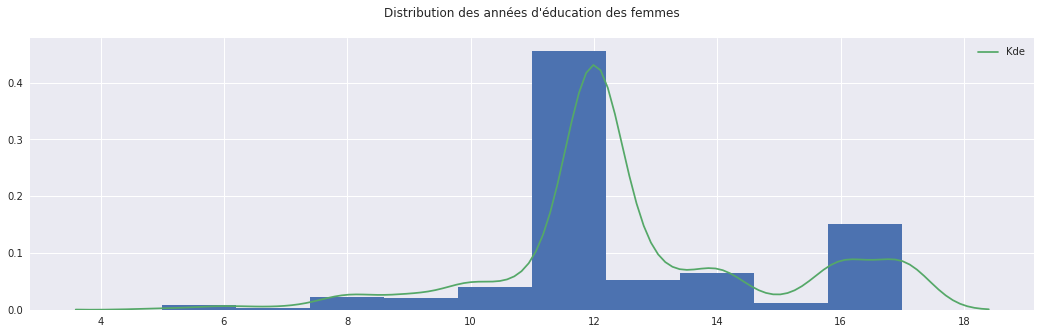

In [19]:
plt.figure(figsize=(18, 5))
plt.hist(df_filtered['educ'], density=True)
sns.kdeplot(df_filtered['educ'], label="Kde")
plt.title("Distribution des années d'éducation des femmes\n")
plt.show()

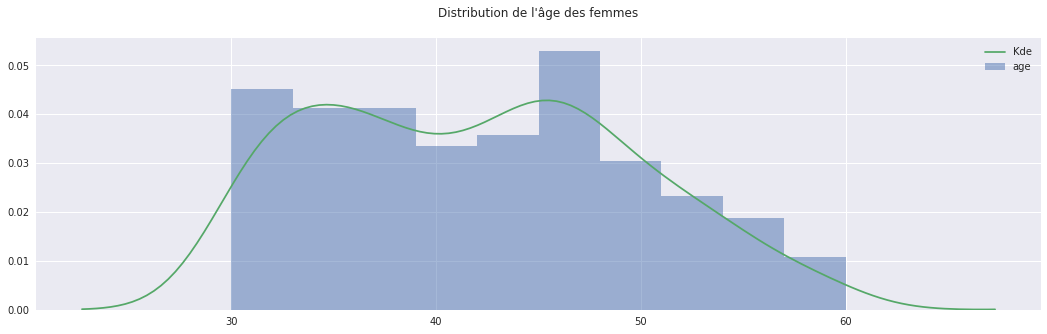

In [20]:
plt.figure(figsize=(18, 5))
plt.hist(df_filtered['age'], density=True, alpha=0.5, label='age')
sns.kdeplot(df_filtered['age'], label="Kde")
plt.title("Distribution de l'âge des femmes\n")
plt.legend()
plt.show()

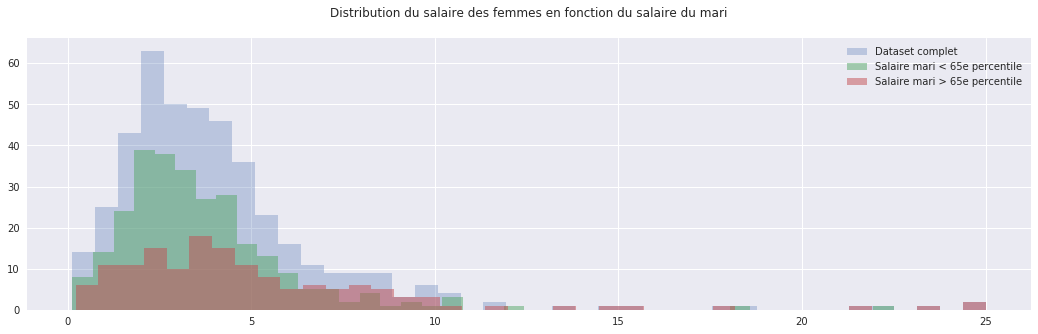

In [21]:
plt.figure(figsize=(18, 5))

plt.hist(df_filtered['wage'], label='Dataset complet', alpha=0.3, bins=40)
plt.hist(df_huswage_lt_65['wage'], label='Salaire mari < 65e percentile', alpha=0.5, bins=40)
plt.hist(df_huswage_gt_65['wage'], label='Salaire mari > 65e percentile', alpha=0.5, bins=40)

plt.legend()
plt.title("Distribution du salaire des femmes en fonction du salaire du mari\n")
plt.show()

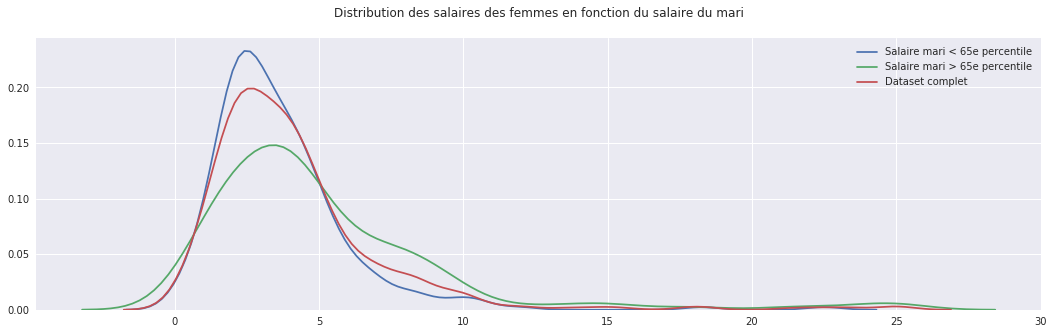

In [22]:
plt.figure(figsize=(18, 5))

sns.kdeplot(df_huswage_lt_65['wage'], label='Salaire mari < 65e percentile')
sns.kdeplot(df_huswage_gt_65['wage'], label='Salaire mari > 65e percentile')
sns.kdeplot(df_filtered['wage'], label='Dataset complet')

plt.legend()
plt.title("Distribution des salaires des femmes en fonction du salaire du mari\n")
plt.show()

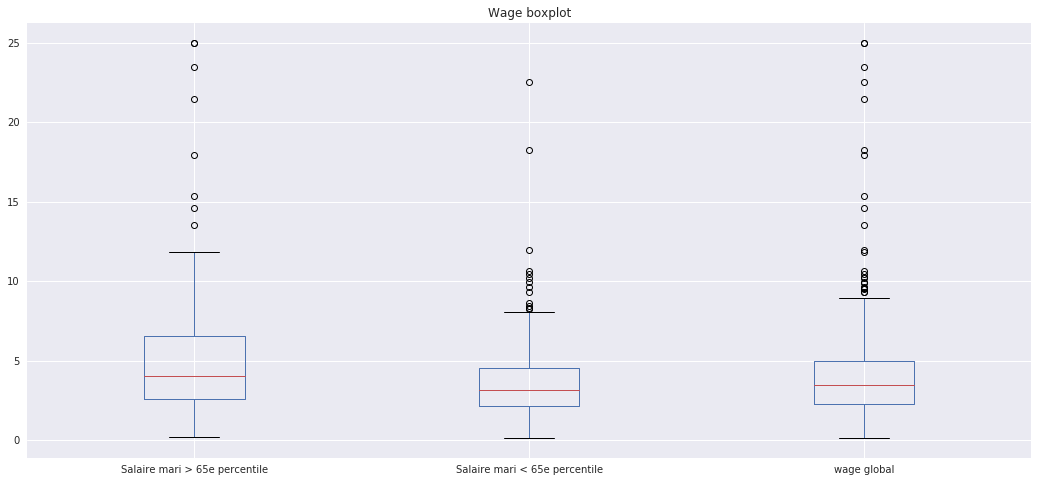

In [23]:
df_huswage_concat = pd.concat([df_huswage_gt_65['wage'], df_huswage_lt_65['wage'], df_filtered['wage']], axis=1)
df_huswage_concat.columns = ['Salaire mari > 65e percentile', 'Salaire mari < 65e percentile', 'wage global']

df_huswage_concat.boxplot(figsize=(18, 8))
plt.title("Wage boxplot")
plt.show()

> Ces graphes nous illustrent donc ce que nous avions présenti avec les permiers chiffres. Nous devrions donc bien avoir une corrélation positive entre le salaire du mari et celui de son épouse.

### **Question 3 :**

Faire l'histogramme de la variable `wage`. Supprimer les observations qui sont à plus de 3
écart-types de la moyenne et refaire l’histogramme.

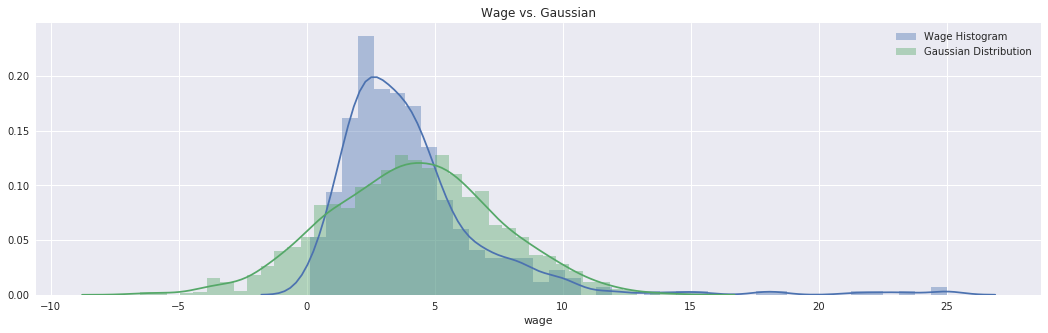

In [24]:
gauss_wage = stats.norm.rvs(np.mean(df_filtered.wage), np.std(df_filtered.wage), size=2000)

plt.figure(figsize=(18, 5))
plt.title("Wage vs. Gaussian")
sns.distplot(df_filtered.wage, bins=40, label='Wage Histogram')
sns.distplot(gauss_wage, bins=40, label='Gaussian Distribution')
plt.legend()
plt.show()

> On supprime maintenant les observations qui sont à plus de 3 écart-types de la moyenne.

In [25]:
wage_to_filt = df_filtered['wage'].mean() + 3 * df_filtered['wage'].std()

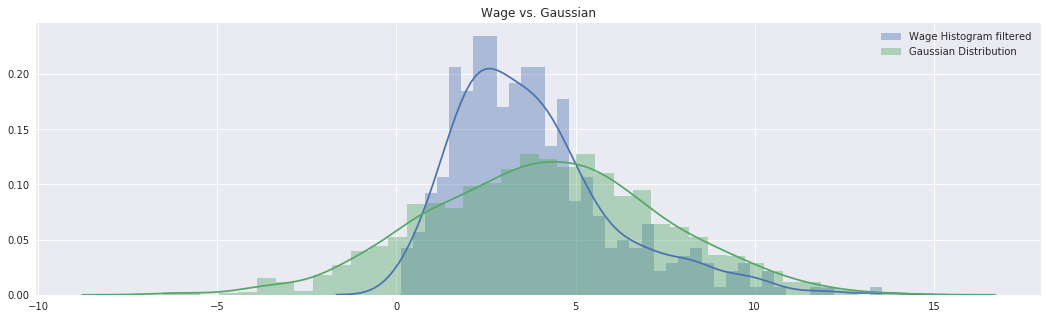

In [26]:
plt.figure(figsize=(18, 5))
plt.title("Wage vs. Gaussian")
sns.distplot(df_filtered[df_filtered['wage'] < wage_to_filt][['wage']], bins=40, label='Wage Histogram filtered')
sns.distplot(gauss_wage, bins=40, label='Gaussian Distribution')
plt.legend()
plt.show()

> En filtrant les salaires à plus de 3 écarts types de la moyenne, nous nous rapprochons d'une gaussienne classique.

### **Question 4 :**
Calculer les corrélations `motheduc` et `fatheduc`. Expliquer le problème de multi-collinéarité.
Commenter.

In [27]:
pearson_corr = df_filtered[['motheduc', 'fatheduc']].corr(method='pearson')

pearson_corr

,motheduc,fatheduc
motheduc,1.000000,0.554063
fatheduc,0.554063,1.000000


In [28]:
p_value_corr = pearsonr(df_filtered.motheduc, df_filtered.fatheduc)[1]

print('\nLa corrélation de Pearson entre motheduc et fatheduc est de {}'
      .format(np.round(pearson_corr.iloc[0,1], 3)))

print('\nLa p-value pour H0 "pas de corrélation" est de {}'.format(p_value_corr))


La corrélation de Pearson entre motheduc et fatheduc est de 0.554

La p-value pour H0 "pas de corrélation" est de 8.302344435821678e-36


> La corrélation entre le nombre d'années d'études de la femme et le nombre d'années d'études de son mari est donc d'environ **55 %**. On peut l'expliquer par le fait que les deux personnes du couple appartiennent souvent à une même classe sociales et ont donc accès aux mêmes possibilités d'éducation.

> De plus, **on rejette l'hypothèse nulle selon laquelle il n'y aurait pas de corrélation au seuil 5%**. 

> La corrélation entre ces deux variables peut introduire un **biais de multicolinéarité**. Dans une régression, la multicolinéarité est un problème qui survient lorsque certaines variables de prévision du modèle mesurent le même phénomène. Une multicolinéarité prononcée s’avère donc problématique, car elle peut augmenter la variance des coefficients de régression et les rendre instables et difficiles à interpréter. 

> Aussi, nous concernant, le fait de prendre en compte les deux variables `motheduc` et `fatheduc` dans nos modèles va venir **surpondérer l'information sur l'éducation des parents**. On peut toutefois nuancer cela avec le fait que la corrélation n'est pas parfaite (55% "seulement") donc les deux variables sont suceptibles d'apporter de l'information utile. Typiquement ce taux de corrélation peut nous amener à penser que :
- lorsque l'épouse fait des études longues, le mari en fait moins 
- et vice-versa


### **Question 5 :**

Faites un graphique en nuage de point entre `wage` et `educ`. S'agit-il d'un effet "toute chose
étant égale par ailleurs" ?

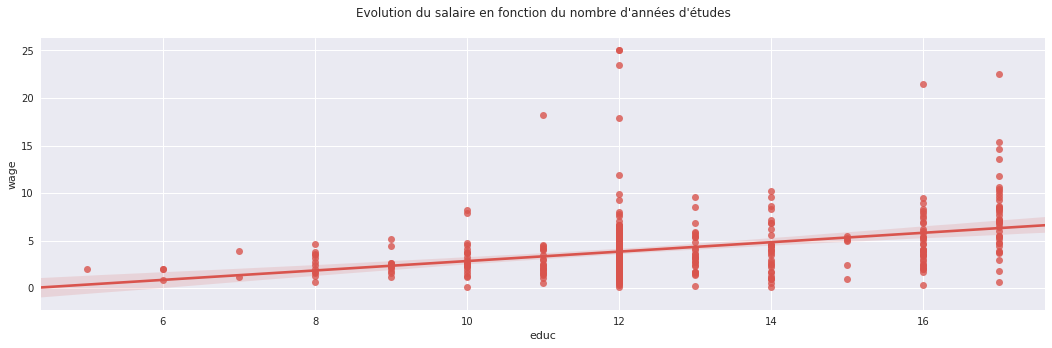

In [29]:
plt.figure(figsize=(18, 5))
sns.regplot(df_filtered.educ, df_filtered.wage, fit_reg=True, color=sns.xkcd_rgb["pale red"])
plt.title("Evolution du salaire en fonction du nombre d'années d'études\n")
plt.show()

> La regression linéaire du salaire en fonction des années d'études nous montre que **le salaire croît proportionnellement au nombre d'années d'études**. Aussi, plus le nombre d'années d'études est grand, plus le salaire a des chances d'être importants.

> Il faut toutefois nuancer quelques peu car **la variance dans les niveaux de salaire semble également augmenter avec le nombre d'années d'études** (pics à 12 et 17). Il peut donc y avoir des problèmes d'*hétéroscedasticité* (*les variances des résidus des variables examinées sont différentes*).

> On constate par ce graphique **qu'il ne s'agit pas d'un effet "toute chose étant égale par ailleurs"**. En effet, pour chaque données de ces variables, les autres variables ne sont pas constantes.

### **Question 6 :**

Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? 

> L'hypothèse fondamentale qui garanti des estimateurs non biaisés est **la normalité des résidus**. Celle-ci permet d'obtenir le meilleur estimateur linéaire non baisé (***BLUE***). Dans cette hypothèse, les résidus sont contrés en zéro et ont une variance constante à travers le temps (*iid*). On parle **d'homoscedasticité**.

Expliquer le biais de variable omise.

> Le biais de variable omise correspond au fait que **nous estimons un modèle en ne prenant en compte que certaines variables alors qu'il en existe d'autres que nous ne pouvons pas contrôler**, souvent par manque de données. Une variable omise viole l'hypothèse de normalité des résidus puisque l'effet de ces variables se retrouve en partie dans les résidus en question.

### **Question 7 :**

Faire la régression du log de `wage` en utilisant comme variables explicatives une `constante`,
`city`, `educ`, `exper`, `nwifeinc`, `kidslt6`, `kidsge6`. Commentez l'histogramme des résidus.

In [30]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X = df_filtered[cols_to_keep]
X = sm.add_constant(X)
y = df_filtered.lwage

In [31]:
model = sm.OLS(y, X) 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        10:40:24   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [32]:
print(results.pvalues)

const       5.465894e-02
city        6.155457e-01
educ        4.324526e-11
exper       6.133651e-04
nwifeinc    1.434080e-01
kidslt6     5.956626e-01
kidsge6     6.642512e-01
dtype: float64


> **L'éducation apparaît donc comme la variable la plus significative** lorsqu'on utilise une constante. 

In [33]:
residuals = results.resid

gauss_residuals = stats.norm.rvs(np.mean(residuals), np.std(residuals), size=2000)

lwage_to_filt = df_filtered['lwage'].mean() + 3 * df_filtered['lwage'].std()
gauss_residuals_corr = stats.norm.rvs(np.mean(residuals[residuals < lwage_to_filt]), 
                                      np.std(residuals[residuals < wage_to_filt]), size=2000)

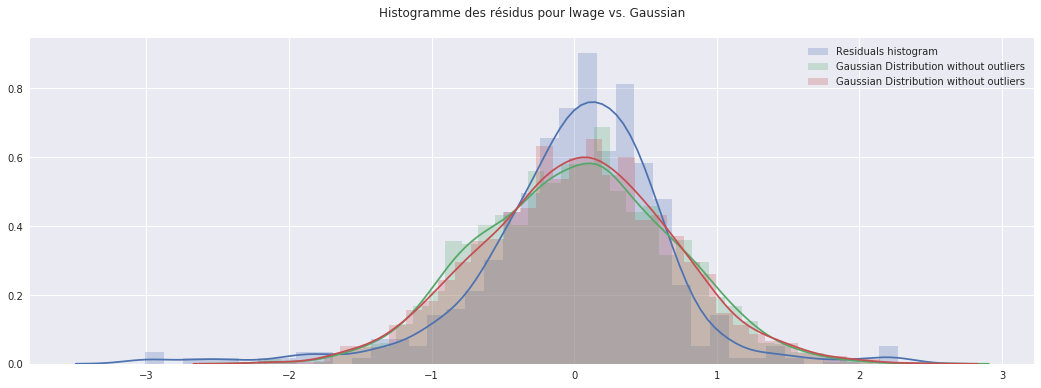

In [34]:
plt.figure(figsize=(18, 6))
plt.title("Histogramme des résidus pour lwage vs. Gaussian\n")
sns.distplot(residuals, bins=40, hist_kws={'alpha':0.25}, label='Residuals histogram')
sns.distplot(gauss_residuals, bins=40, hist_kws={'alpha':0.25}, label='Gaussian Distribution without outliers')
sns.distplot(gauss_residuals_corr, bins=40, hist_kws={'alpha':0.25}, label='Gaussian Distribution without outliers')
plt.legend()
plt.show()

> Les résidus sont **quasiment gaussiens et centrés en zéro**. L'hypothèse de normalité des résidus est relativement bonne.

> La distribution gaussienne de même moyenne / variance que la courbe des résidus est très proche de celle tracées sans les valeurs extrêmes (avec la méthode de filtrage utilisée en question 3).

> ***Dans la suite, nous continuerons de travailler avec `lwage` plutôt qu'avec `wage`***.

### **Question 8 :**
Tester l'hypothèse de non significativité de `nwifeinc` avec un seuil de significativité de 1%, 5%
et 10% (test alternatif des deux côtés). Commentez les p-values.

> On veut tester la significativité de `nwifeinc`, aussi, il nous faut comparer l'échantillon avec cette variable et l'échantillon sans cette variable. Pour ce faire, nous allons donc tester l'hypothèse $$H_0 : β_{\text{nwifeinc}} = 0$$
Nous allons donc avoir un modèle non contraint et un modèle contraint sur lequel nous allons réaliser un test de Fisher.

#### **Modèle non contraint**

In [35]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X0 = df_filtered[cols_to_keep]
X0 = sm.add_constant(X0)
y = df_filtered.lwage

model = sm.OLS(y, X0) 
results = model.fit()

u = results.resid
SSR0 = u.T @ u

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        10:40:25   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [36]:
print(results.pvalues)

const       5.465894e-02
city        6.155457e-01
educ        4.324526e-11
exper       6.133651e-04
nwifeinc    1.434080e-01
kidslt6     5.956626e-01
kidsge6     6.642512e-01
dtype: float64


In [37]:
p_value = results.pvalues['nwifeinc']

#### **Modèle contraint**

In [38]:
cols_to_keep = ['city', 'educ', 'exper', 'kidslt6', 'kidsge6']

X1 = df_filtered[cols_to_keep]
X1 = sm.add_constant(X1)
y = df_filtered.lwage

model = sm.OLS(y,X1)
results = model.fit()
print(results.summary())
u = results.resid
SSR1 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     15.04
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.34e-13
Time:                        10:40:26   Log-Likelihood:                -433.01
No. Observations:                 428   AIC:                             878.0
Df Residuals:                     422   BIC:                             902.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3810      0.207     -1.841      0.0

In [39]:
n,k = np.shape(X0)
F = ((SSR1-SSR0)/1) / (SSR0/(n-k)) # 1 pour le nombre de variables laissées de côtés (1 sur 6 ici)

p_value = f.sf(F,1,n-k) # 1 degré de liberté
 
print('p_value : ', p_value) 
print('Fisher : ', F)

p_value :  0.14340798202515265
Fisher :  2.1490137564707084


In [40]:
for i in [0.01, 0.05, 0.1]:
    
    print('---- Test au seuil de {}% ----'.format(i*100))
   
    if (p_value < i):
        print('p_value < seuil => On rejette l\'hypothèse H0 de non significativité de nwifeinc \n')
    else:
        print('p_value > seuil => On ne rejette pas l\'hypothèse H0 de non significativité de nwifeinc \n')

---- Test au seuil de 1.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 de non significativité de nwifeinc 

---- Test au seuil de 5.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 de non significativité de nwifeinc 

---- Test au seuil de 10.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 de non significativité de nwifeinc 



> La p-value de la variable `nwifeinc` étant relativement élevée, on ne rejette pas l'hypothèse de non significativité de la variable sur `lwage`. **`nwifeinc` n'est donc pas significatif sur aux trois seuils testés**.

### **Question 9 :**

Tester l’hypothèse que le coefficient associé à `nwifeinc` est égal à 0.01 avec un seuil de
significativité de 5% (test à alternatif des deux côtés).

> On veut maintenant tester avec un test de Fischer au seuil de 5% que  $$H_0 : β_{\text{nwifeinc}} = 0.01$$

#### **Modèle contraint**

In [41]:
y_p = y - 0.01 * X0['nwifeinc'] # on calcule notre nouveau y (y prime : y_p)

cols_to_keep = ['city', 'educ', 'exper', 'kidslt6', 'kidsge6']

X2 = df_filtered[cols_to_keep]
X2 = sm.add_constant(X2)


model = sm.OLS(y_p, X2)
results = model.fit()
print(results.summary())
u = results.resid
SSR2 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.75e-12
Time:                        10:40:26   Log-Likelihood:                -433.12
No. Observations:                 428   AIC:                             878.2
Df Residuals:                     422   BIC:                             902.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4178      0.207     -2.018      0.0

In [42]:
n,k = np.shape(X0)
F = ((SSR2-SSR0)/1) / (SSR0/(n-k)) # 1 pour le nombre de variables laissées de côtés (1 sur 6 ici)

p_value = f.sf(F,1,n-k) # 1 degré de liberté
 
print('p_value : ', p_value)
print('Fisher : ', F)

p_value :  0.12519418591701537
Fisher :  2.360491114938522


In [43]:
for i in [0.05]:
    
    print('---- Test au seuil de {}% ----'.format(i*100))
   
    if (p_value < i):
        print('p_value < seuil => On rejette l\'hypothèse H0 \n')
    else:
        print('p_value > seuil => On ne rejette pas l\'hypothèse H0 \n')

---- Test au seuil de 5.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 



> L'hypothèse $H_0 : β_{\text{nwifeinc}} = 0.01$ est donc valable au seuil de 5%.

### **Question 10 :**
Tester l’hypothèse jointe que le coefficient de `nwifeinc` est égal à 0.01 et que celui de `city` est égal à 0.05.

> On veut maintenant tester avec un test de Fischer au seuil de 5% que  $$H_0 : β_{\text{nwifeinc}} = 0.01 \text{ , } β_{\text{city}} = 0.05 $$

#### **Modèle contraint**

In [44]:
y_p = y - 0.01 * X0['nwifeinc'] - 0.05 * X0['city']  # on calcule notre nouveau y (y prime : y_p)

cols_to_keep = ['educ', 'exper', 'kidslt6', 'kidsge6']

X3 = df_filtered[cols_to_keep]
X3 = sm.add_constant(X3)


model = sm.OLS(y_p, X3)
results = model.fit()
print(results.summary())
u = results.resid
SSR3 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.84
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.34e-12
Time:                        10:40:26   Log-Likelihood:                -433.28
No. Observations:                 428   AIC:                             876.6
Df Residuals:                     423   BIC:                             896.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4287      0.206     -2.082      0.0

In [45]:
n,k = np.shape(X0)
F = ((SSR3-SSR0)/2) / (SSR0/(n-k)) # 2 pour le nombre de variables laissées de côtés (2 sur 6 ici)

p_value = f.sf(F,2,n-k) # 2 degré de liberté
 
print('p_value : ', p_value)
print('Fisher : ', F)

p_value :  0.26372671362528977
Fisher :  1.3370704454928102


In [46]:
for i in [0.05]:
    
    print('---- Test au seuil de {}% ----'.format(i*100))
   
    if (p_value < i):
        print('p_value < seuil => On rejette l\'hypothèse H0 \n')
    else:
        print('p_value > seuil => On ne rejette pas l\'hypothèse H0 \n')

---- Test au seuil de 5.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 



> L'hypothèse  $H_0 : β_{\text{nwifeinc}} = 0.01 \text{ , } β_{\text{city}} = 0.05 $ est donc valable au seuil de 5%.

### **Question 11 :**

Tester l’hypothèse jointe que $β_{\text{nwifeinc}} + β_{\text{city}} = 0.1$ et $β_{\text{educ}} + β_{\text{exper}} = 0.1$.

> On teste donc ici avec un test de Fischer au seuil de 5% que  
$$H_0 : β_{\text{nwifeinc}} + β_{\text{city}} = 0.1 \text{ , } β_{\text{educ}} + β_{\text{exper}} = 0.1$$

> Cela revient à réécrire le modèle en fonction de 
$$\theta_1 = 1 - \frac{β_{\text{nwifeinc}} - β_{\text{city}}}{0.1} \text{ et } \theta_2 = 1 - \frac{β_{\text{educ}} - β_{\text{exper}}}{0.1} $$
Cela revient à redéfinir 
$$ y \prime = y - \frac{\text{nwifeinc} - \text{city}}{0.1} $$
Que l'on exprime en fonction d'une `constante`, `nwifeinc/0.1`, `(nwifeinc - city)/0.1`, `educ/0.1`, `(educ - exper)/0.1`, `kidslt6`, `kidsge6`.

#### **Modèle contraint**

In [47]:
y_p = y - X0['nwifeinc']/0.1 - X0['educ']/0.1  # on calcule notre nouveau y (y prime : y_p)

cols_to_keep = ['kidslt6', 'kidsge6']

X4 = pd.concat([X0[cols_to_keep], X0['nwifeinc']/0.1, (X0['nwifeinc']-X0['city'])/0.1, 
               X0['educ']/0.1, (X0['educ']-X0['exper'])/0.1], axis=1)
X4 = sm.add_constant(X4)

model = sm.OLS(y_p, X4)
results = model.fit()
print(results.summary())
u = results.resid
SSR4 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.079e+06
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:40:26   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [48]:
n,k = np.shape(X0)
F = ((SSR4-SSR0)/2) / (SSR0/(n-k)) # 2 pour le nombre de variables laissées de côtés (2 sur 6 ici)

p_value = f.sf(F,2,n-k) # 2 degré de liberté
 
print('p_value : ', p_value)
print('Fisher : ', F)

p_value :  0.9999999999989484
Fisher :  1.0468817291174788e-12


In [49]:
for i in [0.05]:
    
    print('---- Test au seuil de {}% ----'.format(i*100))
   
    if (p_value < i):
        print('p_value < seuil => On rejette l\'hypothèse H0 \n')
    else:
        print('p_value > seuil => On ne rejette pas l\'hypothèse H0 \n')

---- Test au seuil de 5.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 



### **Question 12 :**
Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation
et l’expérience professionnelle. Commentez

In [50]:
cols_to_keep = ['educ', 'exper']

X5 = df_filtered[cols_to_keep]
X5 = sm.add_constant(X5)
y = df_filtered.lwage

model = sm.OLS(y, X5) 
results = model.fit()

u = results.resid

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.51e-15
Time:                        10:40:26   Log-Likelihood:                -433.74
No. Observations:                 428   AIC:                             873.5
Df Residuals:                     425   BIC:                             885.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4002      0.190     -2.102      0.0

In [51]:
p = results.params
print(p)

const   -0.400174
educ     0.109489
exper    0.015674
dtype: float64


> On va afficher le résultat de la regression en 3 dimensions, le but est donc de tracer :

$$
\text{lwage} =  β_{\text{educ}}.\text{educ} +  β_{\text{exper}}.\text{exper} + \text{cte}
$$

Soit : 
$$
\text{z} =  β_{\text{educ}}.\text{x} +  β_{\text{exper}}.\text{y} + \text{cte}
$$

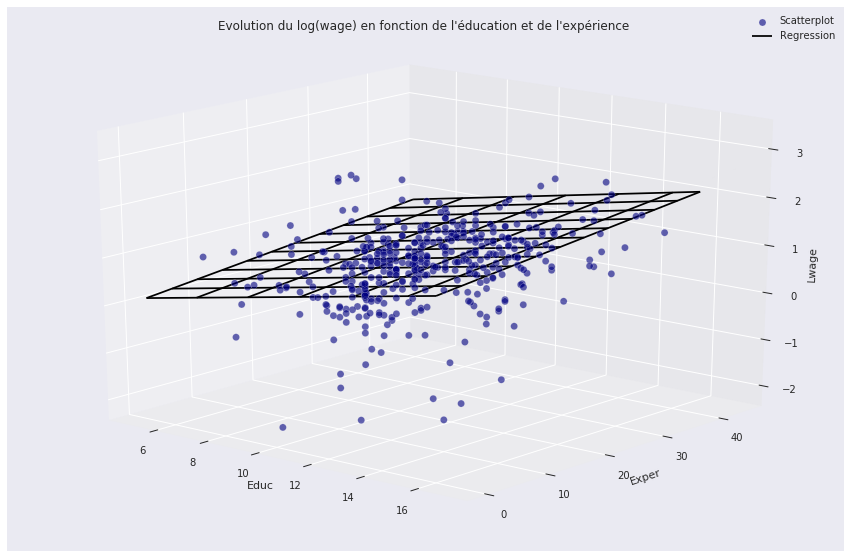

In [52]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d', elev=20, azim=-50)

# nuage de points educ, exper et lwage
xs = df_filtered.educ
ys = df_filtered.exper
zs = df_filtered.lwage
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color='navy', label='Scatterplot')

# réalisation du plan de régression
X6 = np.arange(df['educ'].min(), df['educ'].max(), 1)
Y6 = np.arange(df['exper'].min(), df['exper'].max(), 1)
X6, Y6 = np.meshgrid(X6, Y6)

Z6 =  p.educ * X6 + p.exper * Y6 + p.const

ax.plot_wireframe(X6, Y6, Z6, rstride=4, cstride=2, color='black', label='Regression')

ax.set_xlabel('Educ')
ax.set_ylabel('Exper')
ax.set_zlabel('Lwage')
ax.legend()
plt.title("Evolution du log(wage) en fonction de l'éducation et de l'expérience \n")
plt.show()

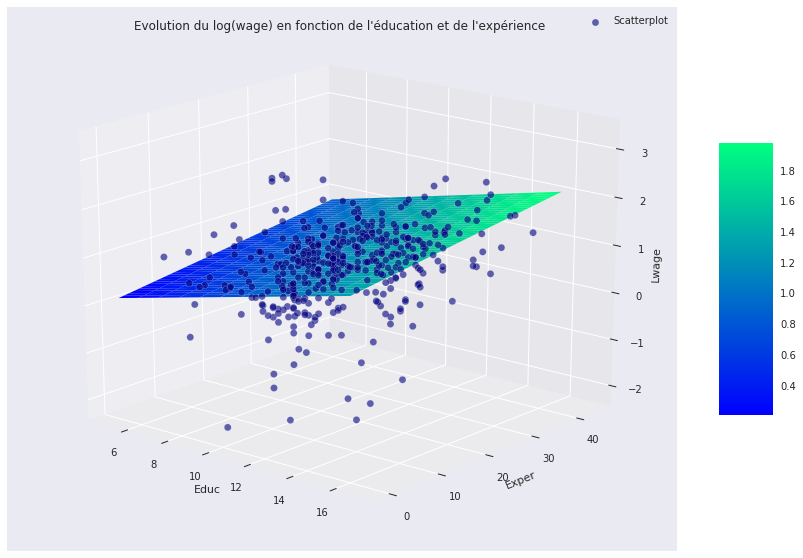

In [53]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d', elev=20, azim=-50) 

xs = df_filtered.educ
ys = df_filtered.exper
zs = df_filtered.lwage
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color='navy', label='Scatterplot')

# réalisation du plan de régression
X6 = np.arange(df['educ'].min(), df['educ'].max(), 1)
Y6 = np.arange(df['exper'].min(), df['exper'].max(), 1)
X6, Y6 = np.meshgrid(X6, Y6)

Z6 =  p.educ * X6 + p.exper * Y6 + p.const

# Plot the surface.
surf = ax.plot_surface(X6, Y6, Z6, cmap=plt.cm.winter, linewidth=0, antialiased=True)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Educ')
ax.set_ylabel('Exper')
ax.set_zlabel('Lwage')
ax.legend()

plt.title("Evolution du log(wage) en fonction de l'éducation et de l'expérience \n")
plt.show()

> Gobalement on voit que **le salaire augmente proportionnelement au niveau d'études et au nombre d'années d'expérience**. Voyons ce que cela donne en projetant dans le plan vertical les variables `educ` et `exper`. On va donc fixer dans un premier temps `exper` à 0 puis `educ` à 0.

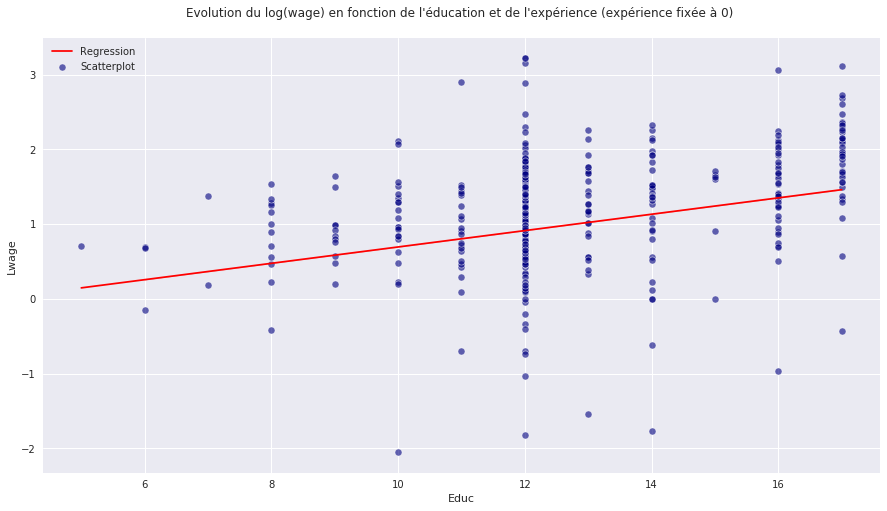

In [54]:
cols_to_keep = ['educ', 'exper', 'lwage']

df_q12 = pd.DataFrame(df_filtered[cols_to_keep])
df_q12['lwage_pred_educ'] = p.educ * df_q12.educ + p.const

fig = plt.figure(figsize=(15,8))

# Ploting scatter points
ax = sns.scatterplot(x=df_q12.educ, y=df_q12.lwage, s=50, alpha=0.6, edgecolors='w', 
                     data=df_q12, color=['navy'], label='Scatterplot')


# Ploting result of OLS 
ax = sns.lineplot(x='educ', y='lwage_pred_educ', data=df_q12, color='red', label='Regression')

ax.set_xlabel('Educ')
ax.set_ylabel('Lwage')
ax.legend()
plt.title("Evolution du log(wage) en fonction de l'éducation et de l'expérience (expérience fixée à 0) \n")
plt.show()

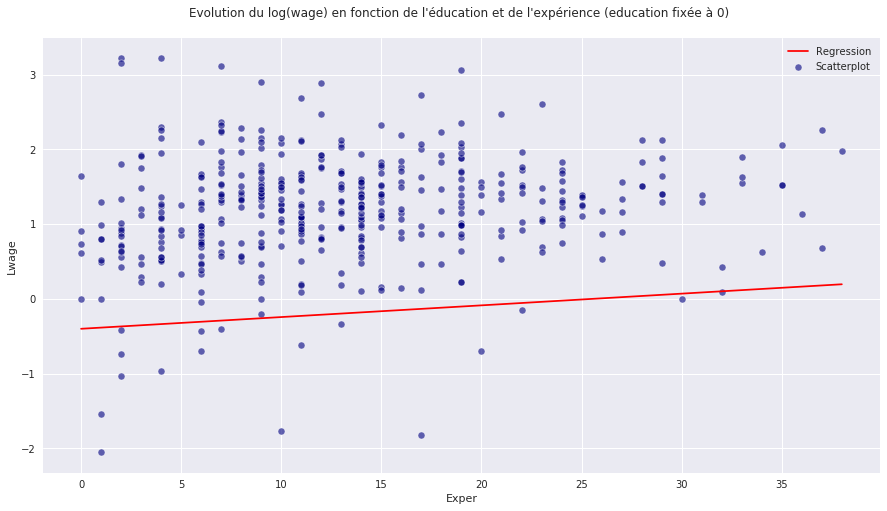

In [55]:
df_q12['lwage_pred_exper'] = p.exper * df_q12.exper + p.const

fig = plt.figure(figsize=(15,8))

# Ploting scatter points
ax = sns.scatterplot(x=df_q12.exper, y=df_q12.lwage, s=50, alpha=0.6, edgecolors='w', 
                     data=df_q12, color=['navy'], label='Scatterplot')

# Ploting result of OLS 
ax = sns.lineplot(x='exper', y='lwage_pred_exper', data=df_q12, color='red', label='Regression')

ax.set_xlabel('Exper')
ax.set_ylabel('Lwage')
ax.legend()
plt.title("Evolution du log(wage) en fonction de l'éducation et de l'expérience (education fixée à 0) \n")
plt.show()

> On confirme donc nos premières impressions de la 3D en précisant cependant que **les années d'études semblent avoir plus d'influence sur l'augmentation du salaire** car la pente de la droite de regression est plus importante pour le premier paramètre.

### **Question 13 :**
Tester l’égalité des coefficients associés aux variables `kidsge6` et `kidslt6`. Interprétez.

> On veut donc tester avec un test de Fischer au seuil de 5% que  

$$H_0 : β_{\text{kidsge6}} = β_{\text{kidslt6}}$$

> Cela revient à réécrire le modèle en fonction de 

$$\theta = β_{\text{kidsge6}} - β_{\text{kidslt6}} \text{  d'où  } β_{\text{kidsge6}} = \theta + β_{\text{kidslt6}}$$



> Ce qui revient à faire une régression de $y$ sur une `constante`, `city`, `educ`, `exper`, `nwifeinc`, `kidsge6 + kidslt6`, `kidsge6` : 

$$ \text{lwage} = β_{\text{city}}.\text{city} + β_{\text{educ}}.\text{educ} + β_{\text{exper}}.\text{exper} + β_{\text{nwifeinc}}.\text{nwifeinc} + β_{\text{kidslt6}}.(\text{kidsge6} + \text{kidslt6}) + \theta.\text{kidsge6} + \text{const} $$

>Nous allons donc regarder la p-valeur associée à `kidsge6` dans notre regression.

#### **Modèle contraint**

In [56]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidsge6']

X7 = pd.concat([X0[cols_to_keep], X0['kidsge6'] + X0['kidslt6']], axis=1) 
X7 = sm.add_constant(X7)

model = sm.OLS(y, X7)
results = model.fit()
print(results.summary())
u = results.resid
SSR7 = u.T@u

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        10:40:34   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [57]:
p_value = results.pvalues['kidsge6']

for i in [0.05]:
    
    print('---- Test au seuil de {}% ----'.format(i*100))
   
    if (p_value < i):
        print('p_value < seuil => On rejette l\'hypothèse H0 \n')
    else:
        print('p_value > seuil => On ne rejette pas l\'hypothèse H0 \n')

---- Test au seuil de 5.0% ----
p_value > seuil => On ne rejette pas l'hypothèse H0 



> **L'hypothèse d'égalité des coefficients associés aux variables `kidsge6` et `kidslt6` est donc vérifiée**. La p-valeur d'environ 71% ne nous permet pas de rejeter l'hypothèse formulée. Compte tenu de la non significativité de chacun des coefficients dans la regression non contraintes, on pourrait supposer qu'ils sont tous deux nuls.

### **Question 14 :**

Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou
les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les
écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

> Pour faire le test de l'hétéroscédasticité de notre modèle, nous allons en fait tester l'hypothèse $H_0$ d'homoscédasticité du modèle dans le cadre de la question 7. Cela revient à utiliser la régression de $u²$ (résidus au carré) en fonction des variables du modèle.   

> On doit tester la significativité globale de la régression suivante :

$$
u² = θ_0 + θ_1.x_1 + \text{ ... } + θ_k.x_k
$$

> Ce qui revient à tester :

$$
H_0 : θ_1 = \text{ ... } = θ_k = 0
$$


#### **a) On repart du modèle non contraint en faisant une regression sur `lwage`**

In [58]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X8 = df_filtered[cols_to_keep]
X8 = sm.add_constant(X8)
y = df_filtered.lwage

model = sm.OLS(y, X8) 
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.00e-13
Time:                        10:40:34   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [59]:
u = results.resid
u2 = u**2

model = sm.OLS(u2,X8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 05 Apr 2020   Prob (F-statistic):             0.0633
Time:                        10:40:34   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

> Le test de Fisher vaut **2.01** avec une p-valeur de **0.063**. Aussi, **on accepte à 5% le fait que les variables explicatives soient homoscédastiques, mais on rejette cette hypothèse à 10%**. Nous avons donc des **sources d'hétéroscédasticités**. 

> Nous allons alors appliquer la correction par la méthode des MCG (Moindres Carrés Généralisés) dans ce cadre uniquement (transformation logarithmique). La p-valeur devrait logiquement augmenter, nous permettant d'accepter $H_0$ avec une plus grande confiance.

#### **b) Calcul du log des résidus pour en déduire les poids du modèle Feasible Weighted Least Squares - Modèle non contraint**

In [60]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X9 = df_filtered[cols_to_keep]
X9 = sm.add_constant(X9)
y = np.log(u2)

model = sm.OLS(u2,X8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 05 Apr 2020   Prob (F-statistic):             0.0633
Time:                        10:40:34   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

#### **c) Calcul du log des résidus pour en déduire les poids du modèle Feasible Weighted Least Squares - Modèle contraint**

In [61]:
g = np.dot(sm.add_constant(X), results.params)
w = np.sqrt(np.exp(g))

model = sm.WLS(u2, X9, weight=1/w)
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 05 Apr 2020   Prob (F-statistic):             0.0633
Time:                        10:40:35   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

#### **d) On refait alors notre test d'hétéroscédasticité grâce aux résidus de notre modèle pondéré**

In [62]:
u = results.resid
u2 = u**2

model = sm.OLS(u2, X8)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9302
Date:                Sun, 05 Apr 2020   Prob (F-statistic):              0.473
Time:                        10:40:35   Log-Likelihood:                -1370.2
No. Observations:                 428   AIC:                             2754.
Df Residuals:                     421   BIC:                             2783.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6351      1.854      0.882      0.3

> La p-valeur a bien augmentée comme attendue, passant désormais à **47.3%**. On peut donc désormais **valider notre hypothèse d'homoscédasticité**, nous n'avons plus d'hétéroscédasticité.

> Les écarts types ont en revanche augmenté avec ce nouveau modèle.

### **Question 15 :**

Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans
et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs.

> Pour cette question, deux approches sont possibles :
- Analyse de variance grâce au One-way ANOVA
- Test de Chow entre les deux groupes

> On va donc commencer par tester l'hypothèse $H_0$ qu'il n'y a pas de changement de structure entre le groupe des femmes de moins de 43 ans et celui des plus de 43 ans.

#### **One-way ANOVA**

In [70]:
stats.f_oneway(df_filtered['nwifeinc'][(df_filtered['age'] <= 43)],
               df_filtered['nwifeinc'][(df_filtered['age'] > 43)])

F_onewayResult(statistic=3.9301463408604556, pvalue=0.04806984276009147)

In [69]:
stats.f_oneway(df_filtered['lwage'][(df_filtered['age'] <= 43)],
               df_filtered['lwage'][(df_filtered['age'] > 43)])

F_onewayResult(statistic=0.16401515217798024, pvalue=0.6856897347649824)

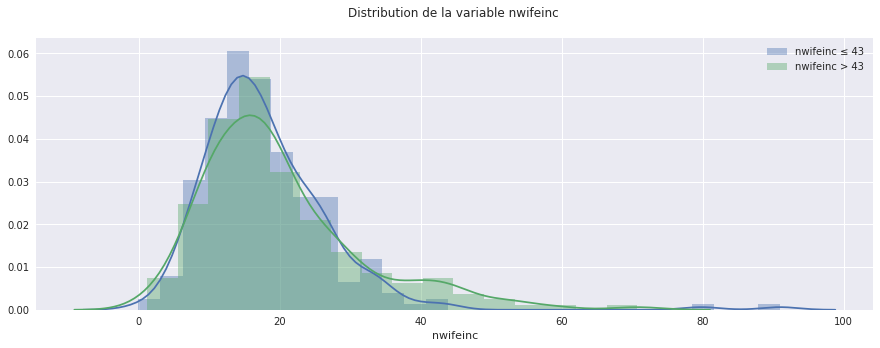

In [124]:
plt.figure(figsize=(15, 5))

sns.distplot(df_filtered['nwifeinc'][(df_filtered['age'] <= 43)], label='nwifeinc ≤ 43')

sns.distplot(df_filtered['nwifeinc'][(df_filtered['age'] > 43)], label='nwifeinc > 43')

plt.title("Distribution de la variable nwifeinc \n")
plt.legend()
plt.show()

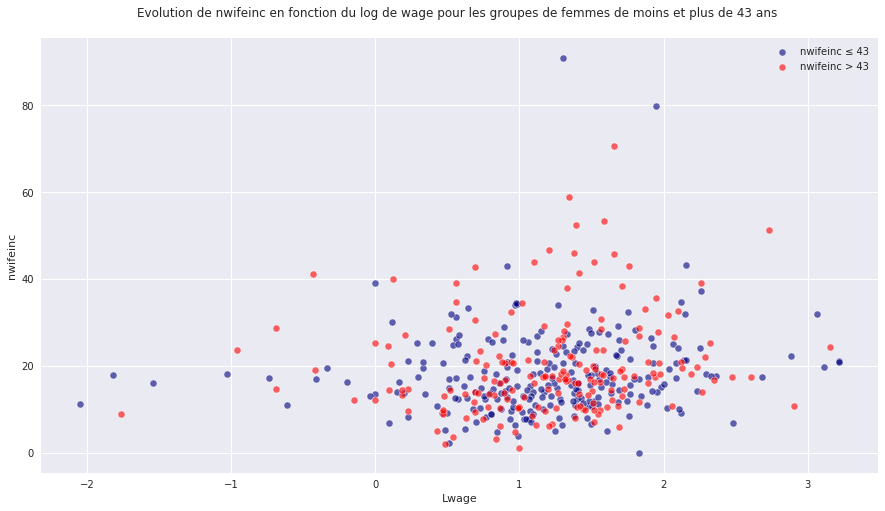

In [123]:
fig = plt.figure(figsize=(15,8))

# Ploting scatter points
ax = sns.scatterplot(y=df_filtered['nwifeinc'][(df_filtered['age'] <= 43)], 
                     x=df_filtered.lwage, data=df_filtered, s=50, alpha=0.6, 
                     edgecolors='w', color=['navy'], label='nwifeinc ≤ 43')

ax = sns.scatterplot(y=df_filtered['nwifeinc'][(df_filtered['age'] > 43)], 
                     x=df_filtered.lwage, data=df_filtered, s=50, alpha=0.6, 
                     edgecolors='w', color=['red'], label='nwifeinc > 43')

ax.set_xlabel('Lwage')
ax.set_ylabel('nwifeinc')
ax.legend()
plt.title("Evolution de nwifeinc en fonction du log de wage pour \
les groupes de femmes de moins et plus de 43 ans \n")
plt.show()

> La p-valeur pour `nwifeinc` étant de **0.048**, on peut conclure à une variance importante de la variable entre le groupe des plus de 43 ans et le groupe des moins de 43 ans. **Nous rejetons donc $H_0$ et il y aurait bien un changement de structure pour la variable `nwifeinc` entre les femmes de plus et celles de moins de 43 ans.**

>Vérifions nos résultats avec un test de Chow entre :
>
>- **0** : le groupe complet
>- **1** : le groupe <= 43 et le reste
>- **2** : le groupe > 43 et le reste

> La statistique de test se construit de la manière suivante :
$$
\textit{F}_{\textit{Chow}} = \frac{\textit{SSR}_0 - (\textit{SSR}_1 + \textit{SSR}_2)}{\textit{SSR}_1 + \textit{SSR}_2} \times \frac{\textit{n}_1 + \textit{n}_2 - 2\textit{k}}{\textit{k}}
$$
>
> Avec :
>- ***N*** : nombre d'observations sur l'échantillon considéré
>- ***k*** : nombre total de paramètres à estimer
>
> Et on teste cette fois-ci qu'il y a une différence entre les groupes considérés.

#### **Test de Chow - Groupe 0**

In [85]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X0 = df_filtered[cols_to_keep]
X0 = sm.add_constant(X0)
y = df_filtered.lwage

model = sm.OLS(y, X0) 
results = model.fit()

u = results.resid
SSR0 = u.T @ u

#### **Test de Chow - Groupe 1**

In [92]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X1 = df_filtered[cols_to_keep][df_filtered['age'] <= 43]
X1 = sm.add_constant(X1)
y = df_filtered['lwage'][df_filtered['age'] <= 43]

model = sm.OLS(y, X1) 
results = model.fit()

u = results.resid
SSR1 = u.T @ u

#### **Test de Chow - Groupe 2**

In [93]:
cols_to_keep = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']

X2 = df_filtered[cols_to_keep][df_filtered['age'] > 43]
X2 = sm.add_constant(X2)
y = df_filtered['lwage'][df_filtered['age'] > 43]

model = sm.OLS(y, X2) 
results = model.fit()

u = results.resid
SSR2 = u.T @ u

In [102]:
n,k = np.shape(X0)
n1 = X1.shape[0]
n2 = X2.shape[0] 

ddl_0 = X0.shape[0] - X0.shape[1] - 1
ddl_1 = X1.shape[0] - X1.shape[1] - 1
ddl_2 = X2.shape[0] - X2.shape[1] - 1


# Stat de test
F = ((SSR0 - (SSR1 + SSR2)) / (SSR1 + SSR2)) * ((n1 + n2 - 2*k) / k)

p_value = f.sf(F, ddl_0 - (ddl_1 + ddl_2), n-k) # 1 degré de liberté
 
print('p_value : ', p_value)
print('Fisher : ', F)

p_value :  0.5799467815504374
Fisher :  0.8260374852756619


> Avec une p-valeur de **0.58**, on peut donc accepter notre hypothèse selon laquelle il existe un changement de structure entre les femmes de plus et celles de moins de 43 ans.

### **Question 16 :**

Ajouter au modèle de la question 7 la variable `huseduc`. Faire ensuite la même régression en
décomposant la variable `huseduc` en 4 variables binaires construites selon votre choix. Faire
le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et
commentez.

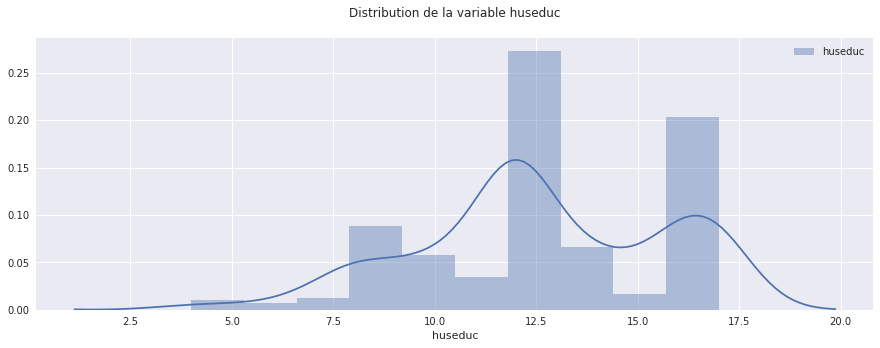

In [122]:
plt.figure(figsize=(15, 5))

sns.distplot(df_filtered['huseduc'], label='huseduc')

plt.title("Distribution de la variable huseduc\n")
plt.legend()
plt.show()

> La répartition de la distribution ci-dessus nous montre qu'il peut être judicieux de décomposer la variable selon les 4 variables binaires suivantes :
>- `huseduc` ≤ 5.0
>- 5.0 < `huseduc` ≤ 10.0
>- 10.0 < `huseduc` ≤ 15.0
>- 15.0 < `huseduc`